# <span style="color:red">House Price Prediction Analysis</span>

please look [here](https://rdrr.io/cran/mosaicData/man/SaratogaHouses.html) to know More about this Dataset.

### Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.plotly as py
#import plotly.graph_objs as go

#py.offline.init_notebook_mode(connected=True)

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('housingdata.csv')

In [3]:
df.drop('Unnamed: 0',axis =1,inplace = True)
df.head()

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
0,132500,0.09,No,42,50000,No,No,Electric,Electric,Private,906,1,1.0,5
1,181115,0.92,No,0,22300,No,No,Gas,Hot Water,Private,1953,0,2.5,6
2,109000,0.19,No,133,7300,No,No,Gas,Hot Water,Public,1944,1,1.0,8
3,155000,0.41,No,13,18700,No,No,Gas,Hot Air,Private,1944,1,1.5,5
4,86060,0.11,No,0,15000,Yes,Yes,Gas,Hot Air,Public,840,0,1.0,3


#### duplicates

In [4]:
#drop dulicates
df.duplicated().sum()

7

In [5]:
#lets drop 7 duplicates
df.drop_duplicates(inplace = True)

In [6]:
df.duplicated().sum()

0

we have no duplicates

#### Null values

In [7]:
#null values
df.isna().sum()

price           0
lot_size        0
waterfront      0
age             0
land_value      0
construction    0
air_cond        0
fuel            0
heat            0
sewer           0
living_area     0
fireplaces      0
bathrooms       0
rooms           0
dtype: int64

we have no null values

#### some stats

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 1727
Data columns (total 14 columns):
price           1721 non-null int64
lot_size        1721 non-null float64
waterfront      1721 non-null object
age             1721 non-null int64
land_value      1721 non-null int64
construction    1721 non-null object
air_cond        1721 non-null object
fuel            1721 non-null object
heat            1721 non-null object
sewer           1721 non-null object
living_area     1721 non-null int64
fireplaces      1721 non-null int64
bathrooms       1721 non-null float64
rooms           1721 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 201.7+ KB


this shows we have 1728 records with 14 columns of datatypes float,int and object.

In [9]:
df.describe()

,price,lot_size,age,land_value,living_area,fireplaces,bathrooms,rooms
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,212203.641488,0.501156,27.956421,34616.106915,1757.180128,0.603138,1.902382,7.052876
std,98540.055951,0.699877,29.262264,35078.409769,620.081138,0.556120,0.658619,2.313030
min,5000.000000,0.000000,0.000000,200.000000,616.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1302.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1638.000000,1.000000,2.000000,7.000000
75%,259142.000000,0.540000,34.000000,40300.000000,2144.000000,1.000000,2.500000,9.000000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,4.000000,4.500000,12.000000


Initial observation:-
- so from her we see that *minimum price is 5000*.
- maximum  price of house is 775000.
- here minimum age is given 0, whcih can't be.
- minimum land value is 200 and maximum is 412600.
- minimum living area is 616square feet.
- maximum living area is 5228 square feet.
- minimum fireplace is zero.
- maximum fireplace is 4.


In [10]:
df.columns

Index(['price', 'lot_size', 'waterfront', 'age', 'land_value', 'construction',
       'air_cond', 'fuel', 'heat', 'sewer', 'living_area', 'fireplaces',
       'bathrooms', 'rooms'],
      dtype='object')

In [11]:
df.shape

(1721, 14)

our dataset of size of 1720 rows and 14 columns.

### visualizations

### Price

In [12]:
df['price'].value_counts().head(20)

150000    21
225000    21
120000    21
155000    19
195000    18
145000    17
165000    17
220000    16
180000    15
170000    14
185000    14
135000    14
125000    13
175000    13
255000    12
240000    12
215000    12
140000    12
245000    11
265000    11
Name: price, dtype: int64

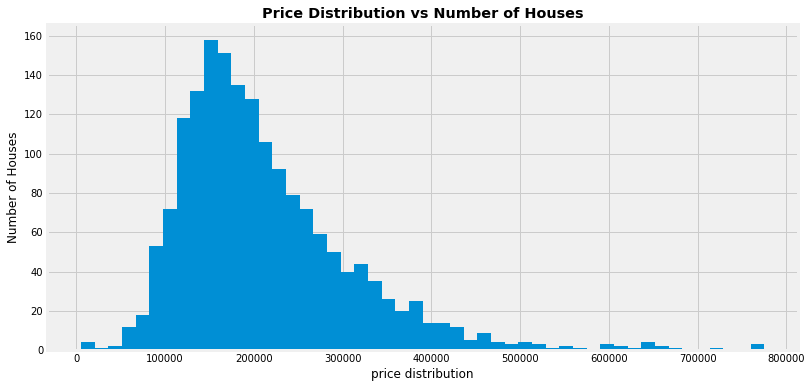

In [14]:
plt.figure(figsize = (12,6))
plt.hist(df['price'],bins = 50)
plt.xlabel("price distribution")
plt.ylabel("Number of Houses")
plt.title("Price Distribution vs Number of Houses",weight = "bold")
plt.show()

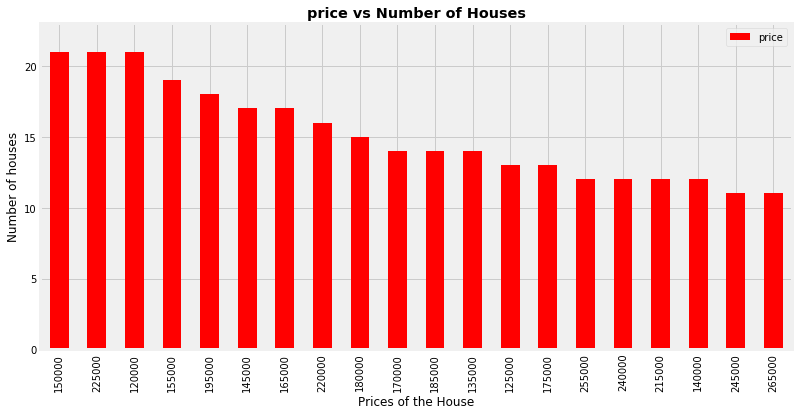

In [15]:
plt.figure(figsize = (12,6))
df['price'].value_counts().head(20).plot(kind='bar',color = 'r')
plt.xlabel("Prices of the House")
plt.ylabel("Number of houses")
plt.title("price vs Number of Houses",weight  = 'bold')
plt.legend()
plt.ylim(0,23)
#plt.gca().set_yticks(data['price'].value_counts().head(30))
plt.show()

In [17]:
df['price'].value_counts().head(20)

150000    21
225000    21
120000    21
155000    19
195000    18
145000    17
165000    17
220000    16
180000    15
170000    14
185000    14
135000    14
125000    13
175000    13
255000    12
240000    12
215000    12
140000    12
245000    11
265000    11
Name: price, dtype: int64

In [18]:
df['price'].min()

5000

In [19]:
df['price'].max()

775000

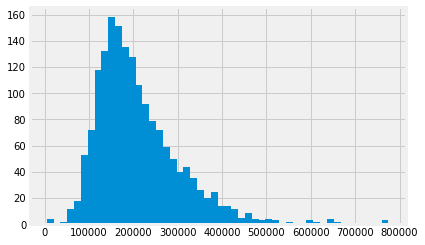

In [22]:
priceplot = plt.hist(df['price'],bins= 50)

**Note**:-
- we have minimum price value 5000 dollars.
- we have maximum price value with 775000 dollars.
- we have 21 houses for 150000dollars,120000dollars,and 225000dollars.
- you can see the distribution of data how it is spread in above.

### lot size

In [23]:
df['lot_size'].max()

12.2

In [24]:
df['lot_size'].min()

0.0

lot size cant be 0, hence drop the rows

In [25]:
df[df['lot_size'] == 0.0]

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
15,89900,0.0,No,88,2500,No,No,Gas,Hot Water,Public,936,0,1.0,4
701,775000,0.0,Yes,5,412600,No,Yes,Gas,Hot Air,Private,2472,1,2.5,9


now lets drop them

In [27]:
df.drop(df.index[[15,701]],inplace = True)

now we droped them.

(array([1.646e+03, 3.900e+01, 1.500e+01, 9.000e+00, 6.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e-02, 1.2290e+00, 2.4480e+00, 3.6670e+00, 4.8860e+00,
        6.1050e+00, 7.3240e+00, 8.5430e+00, 9.7620e+00, 1.0981e+01,
        1.2200e+01]),
 <a list of 10 Patch objects>)

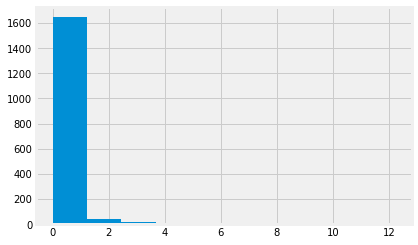

In [28]:
plt.hist(df['lot_size'])

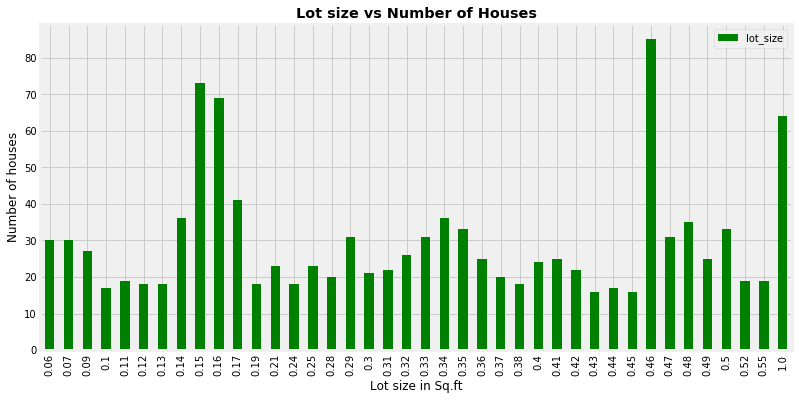

In [29]:
plt.figure(figsize = (12,6))
df['lot_size'].value_counts().head(40).sort_index().plot(kind = 'bar',color = 'g')
plt.xlabel("Lot size in Sq.ft")
plt.ylabel("Number of houses")
plt.title("Lot size vs Number of Houses",weight  = 'bold')
plt.legend()

- we have more number of plots with 0.46 size, i.e morethan 80.

### waterfront

In [30]:
df['waterfront'].value_counts()

No     1705
Yes      14
Name: waterfront, dtype: int64

Text(0.5,1,'waterfront')

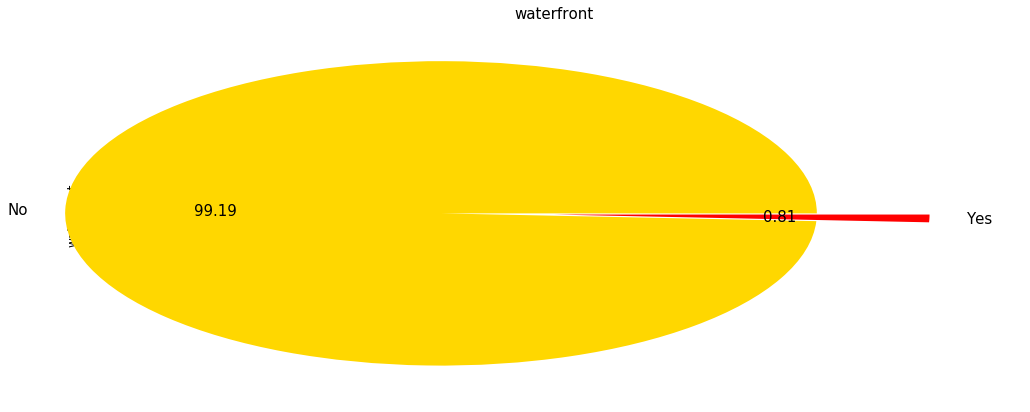

In [34]:
plt.figure(figsize= (15,7))
colors = ('gold','red')
explode = (0.3,0)
df['waterfront'].value_counts().plot(kind = 'pie', autopct='%.2f',explode = explode,colors = colors,fontsize = 15)
plt.title('waterfront',fontsize = 15)

- we have 99.19% houses with no water front.
- we have 0.81% houses with water front which is very less.

### age

In [35]:
df['age'].value_counts().head()

19    93
16    88
18    86
0     83
1     75
Name: age, dtype: int64

In [36]:
df['age'].isna().sum()

0

0 might be a new house.
#we have 0 in value, but we have no null values.

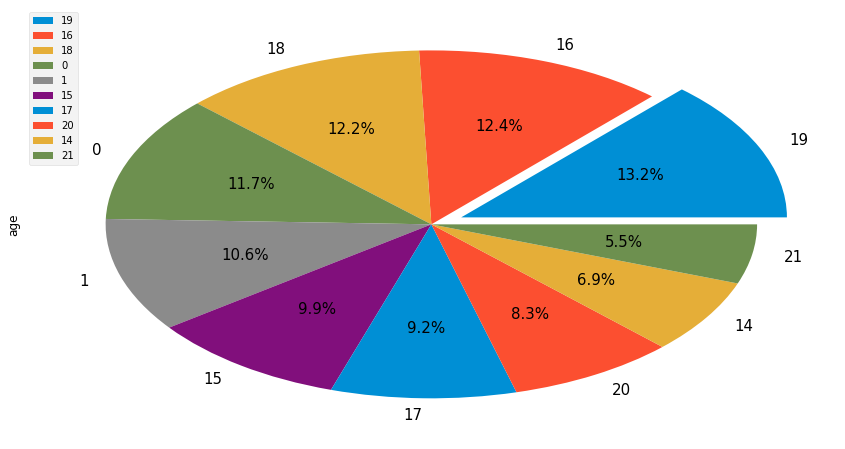

In [38]:
#explode
explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,)


plt.figure(figsize=(13,8))
locplot = df['age'].value_counts()[:10].plot(kind = 'pie',autopct='%.1f%%',explode = explodeTuple,fontsize = 15)
plt.legend(loc = 2)

In [40]:
df['age'].min()

0

In [41]:
df['age'].max()

225

**Note**:- 
- we have maximum age of house is 225.
- we have minimum age of house is 0 that might be a new house.
- we have 13.15 or 93 houses with age 19.

### air condition

In [42]:
df['air_cond'].value_counts()

No     1086
Yes     633
Name: air_cond, dtype: int64

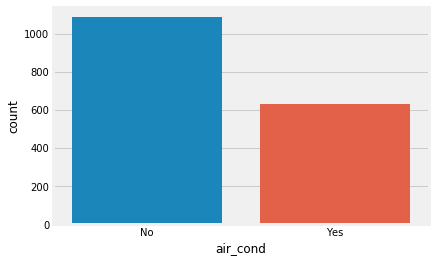

In [43]:
sns.countplot(df['air_cond'])

**Note**:-
- we have 633 houses with air condition.
- we have 1086 houses with no air condition.

### fuel

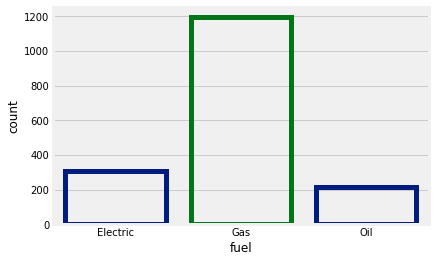

In [44]:
sns.countplot(x="fuel", data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 2))

In [45]:
df['fuel'].value_counts()

Gas         1194
Electric     309
Oil          216
Name: fuel, dtype: int64

**Note**:- 
- we have house with fuel type **Gas** is 1194.
- We have houses with fuel type **Electric** is 309 for heat.
    

### heat

In [46]:
df['heat'].value_counts()

Hot Air      1119
Hot Water     301
Electric      299
Name: heat, dtype: int64

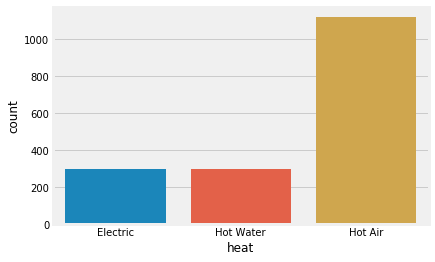

In [47]:
sns.countplot(df['heat'])

**Note**:-
- we have Heat produced through hot air houses is 1119.
- we have heat produced through how water houses is 301.
- we have electric houses that produce heat is 299.

### sewer

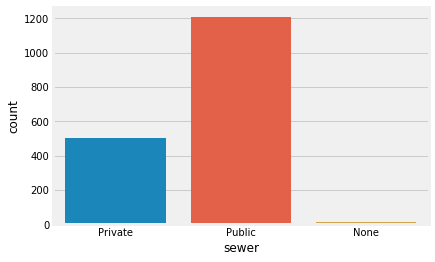

In [48]:
sns.countplot(df['sewer'])

In [49]:
df['sewer'].value_counts()

Public     1206
Private     501
None         12
Name: sewer, dtype: int64

- we have house with public sewage system is 1206.
- we have houses with private sewage system is 501.
- we have houses with no sewege system is 12.

### living area

In [50]:
df['living_area'].value_counts().head(10)

1480    49
912     39
2310    16
960     15
1184    13
1508    13
1368    13
1385    12
936     11
908     11
Name: living_area, dtype: int64

In [51]:
df['living_area'].min()

616

In [52]:
df['living_area'].max()

5228

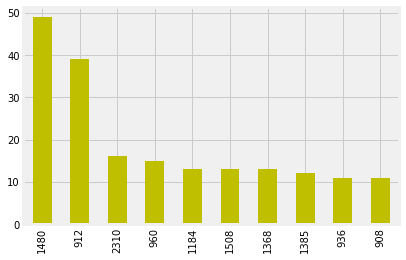

In [54]:
df['living_area'].value_counts().head(10).plot(kind = 'bar',color = 'y')

**Note**:-
- we have 49 houses with 1480 square feet.
- we have 39 houses with 912 square feet.
- we have house with highest living area is 5228 square feet.

### fireplaces

In [55]:
df['fireplaces'].value_counts()

1    939
0    734
2     42
4      2
3      2
Name: fireplaces, dtype: int64

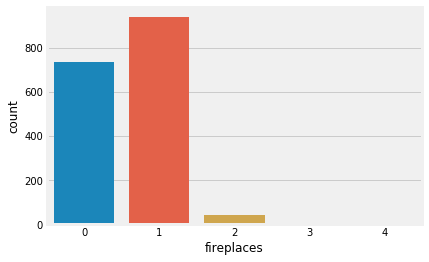

In [52]:
sns.countplot(data['fireplaces'])

**NOTE**:-
- we have house with 1 fire place are 939.
- 734 houses has no fireplace.
- 42 houses has 2 fireplaces.

### bathrooms

In [56]:
df['bathrooms'].value_counts()

2.5    548
1.5    492
1.0    322
2.0    255
3.0     56
3.5     36
4.0      8
0.0      1
4.5      1
Name: bathrooms, dtype: int64

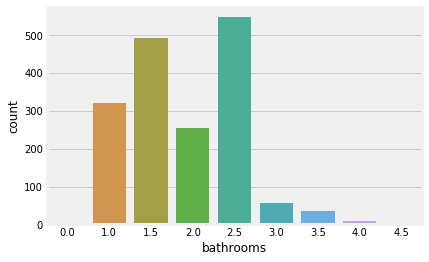

In [57]:
sns.countplot(df['bathrooms'])

**Note**:-
- we have house with 3 bathrooms are 548, but with no shower or tub.
- we have house with 2 bathrooms are 492 but with no shower of tub.
- 322 houses has shower and tub with 1 bathroom.

### rooms

In [58]:
df['rooms'].value_counts()

7     304
8     258
6     247
5     222
4     177
10    141
9     141
3      78
12     77
11     72
2       2
Name: rooms, dtype: int64

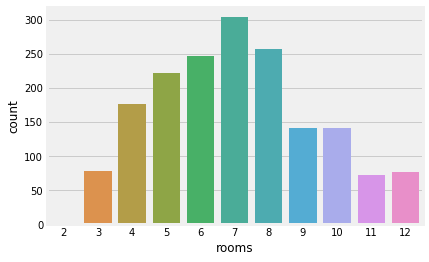

In [59]:
sns.countplot(df['rooms'])

**Note**:-
- we have houses with 7 rooms is 304.
- we have houses with 8 rooms is 258.

###  bivariate analysis

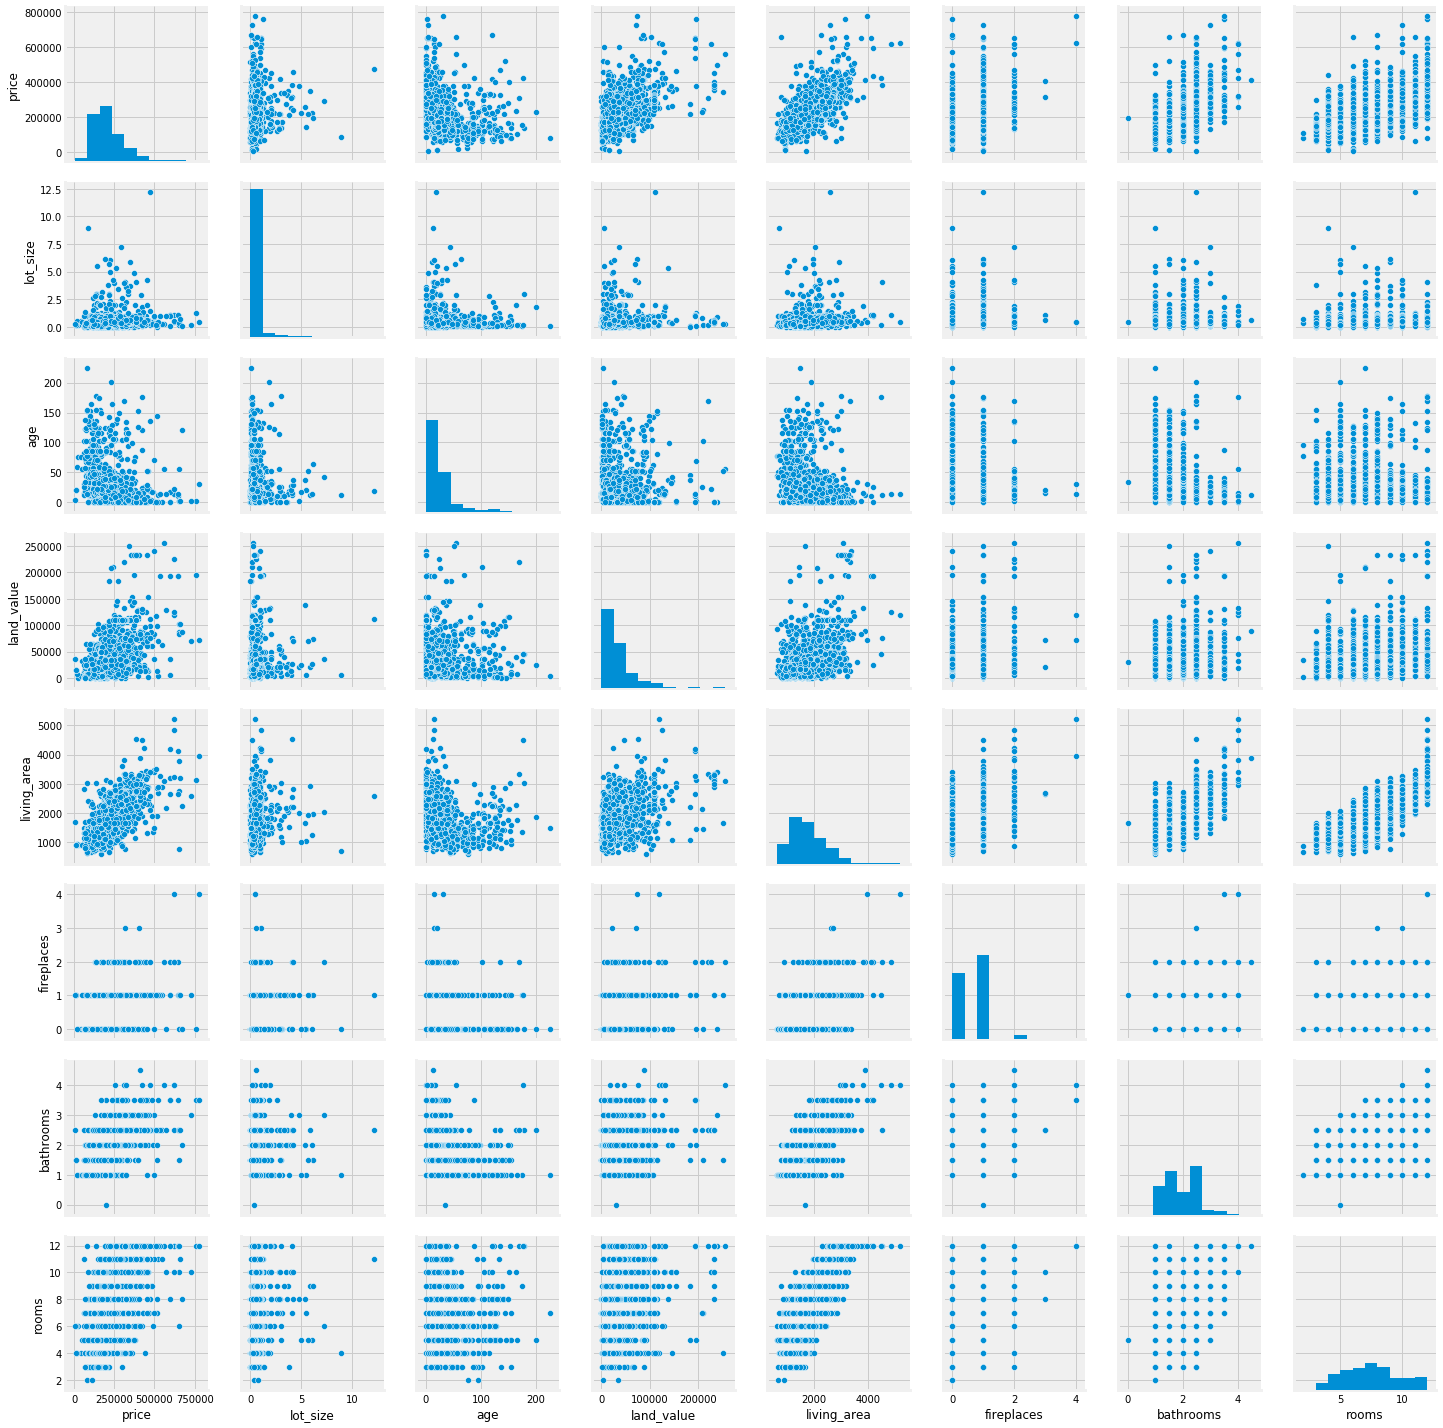

In [67]:
sns.pairplot(df)

- from the pair plot you can get insights like
 - lot size increases with increase in price.
 - with increase in living area there is increase in price.

### air condition vs price

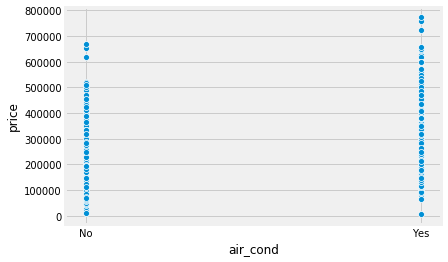

In [66]:
sns.scatterplot(x = 'air_cond', y = 'price', data = df)

so you can see that air condition is not effecting the price of house

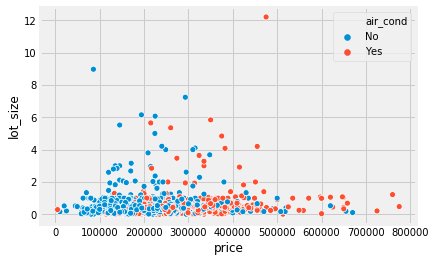

In [67]:
sns.scatterplot(x = 'price', y = 'lot_size', hue = 'air_cond', data = df)


with increase in price gets air condition facility.

### heat map

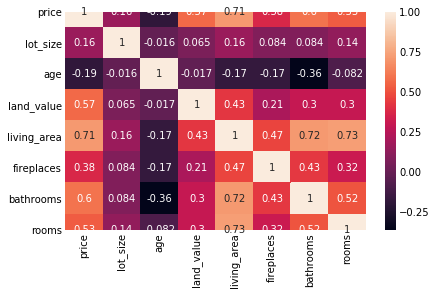

In [68]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [69]:
print(df.corr())

                price  lot_size       age  land_value  living_area  \
price        1.000000  0.160995 -0.187909    0.569607     0.714869   
lot_size     0.160995  1.000000 -0.016298    0.064976     0.162598   
age         -0.187909 -0.016298  1.000000   -0.017017    -0.174107   
land_value   0.569607  0.064976 -0.017017    1.000000     0.430094   
living_area  0.714869  0.162598 -0.174107    0.430094     1.000000   
fireplaces   0.377202  0.084249 -0.171758    0.213729     0.472464   
bathrooms    0.599328  0.083735 -0.362475    0.300973     0.717465   
rooms        0.532526  0.136379 -0.082370    0.302741     0.732533   

             fireplaces  bathrooms     rooms  
price          0.377202   0.599328  0.532526  
lot_size       0.084249   0.083735  0.136379  
age           -0.171758  -0.362475 -0.082370  
land_value     0.213729   0.300973  0.302741  
living_area    0.472464   0.717465  0.732533  
fireplaces     1.000000   0.434763  0.316543  
bathrooms      0.434763   1.000000  0.51

we have no correlation between variables here.

### Model building

In [70]:
#before encoding
df

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
0,132500,0.09,No,42,50000,No,No,Electric,Electric,Private,906,1,1.0,5
1,181115,0.92,No,0,22300,No,No,Gas,Hot Water,Private,1953,0,2.5,6
2,109000,0.19,No,133,7300,No,No,Gas,Hot Water,Public,1944,1,1.0,8
3,155000,0.41,No,13,18700,No,No,Gas,Hot Air,Private,1944,1,1.5,5
4,86060,0.11,No,0,15000,Yes,Yes,Gas,Hot Air,Public,840,0,1.0,3
5,120000,0.68,No,31,14000,No,No,Gas,Hot Air,Private,1152,1,1.0,8
6,153000,0.40,No,33,23300,No,No,Oil,Hot Water,Private,2752,1,1.5,8
7,170000,1.21,No,23,14600,No,No,Oil,Hot Air,Private,1662,1,1.5,9
8,90000,0.83,No,36,22200,No,No,Electric,Electric,Private,1632,0,1.5,8
9,122900,1.94,No,4,21200,No,No,Gas,Hot Air,None,1416,0,1.5,6


In [71]:
#label encoding
df['waterfront']  = pd.get_dummies(data['waterfront'])
df['construction'] = pd.get_dummies(data['construction'])
df['air_cond'] = pd.get_dummies(data['air_cond'])

In [72]:
#onehot encoding
#from sklearn.preprocessing import OneHotEncoder
#ohe  = OneHotEncoder()
fueltype = pd.get_dummies(df['fuel'])
heattype = pd.get_dummies(df['heat'])
sewagetype = pd.get_dummies(df['sewer'])

In [73]:
final=pd.concat([df,fueltype,heattype,sewagetype],axis=1)

In [74]:
final.drop(['fuel','heat','sewer'],axis =1,inplace = True)

In [75]:
#final dataset after encoding
final

,price,lot_size,waterfront,age,land_value,construction,air_cond,living_area,fireplaces,bathrooms,rooms,Electric,Gas,Oil,Electric,Hot Air,Hot Water,None,Private,Public
0,132500,0.09,1,42,50000,1,1,906,1,1.0,5,1,0,0,1,0,0,0,1,0
1,181115,0.92,1,0,22300,1,1,1953,0,2.5,6,0,1,0,0,0,1,0,1,0
2,109000,0.19,1,133,7300,1,1,1944,1,1.0,8,0,1,0,0,0,1,0,0,1
3,155000,0.41,1,13,18700,1,1,1944,1,1.5,5,0,1,0,0,1,0,0,1,0
4,86060,0.11,1,0,15000,0,0,840,0,1.0,3,0,1,0,0,1,0,0,0,1
5,120000,0.68,1,31,14000,1,1,1152,1,1.0,8,0,1,0,0,1,0,0,1,0
6,153000,0.40,1,33,23300,1,1,2752,1,1.5,8,0,0,1,0,0,1,0,1,0
7,170000,1.21,1,23,14600,1,1,1662,1,1.5,9,0,0,1,0,1,0,0,1,0
8,90000,0.83,1,36,22200,1,1,1632,0,1.5,8,1,0,0,1,0,0,0,1,0
9,122900,1.94,1,4,21200,1,1,1416,0,1.5,6,0,1,0,0,1,0,1,0,0


### split the dataset

In [76]:
X = final.drop('price',axis = 1)
y  = df['price']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
X_train.shape

(1151, 19)

In [79]:
y_train.shape

(1151,)

In [80]:
X_test.shape

(568, 19)

In [81]:
y_test.shape

(568,)

### model building

### linear regresssion

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [83]:
lr.score(X_test, y_test)*100

65.88657043186095

### random forest

In [84]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [85]:
rfr.score(X_test,y_test)*100

63.652600723243914

### RIDGE

In [86]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [87]:
rdg.score(X_test,y_test)*100

65.82230733767213

### lasso model

In [88]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [89]:
ls.score(X_test,y_test)*100

65.88629566956459

In [90]:
X_train.head()

,lot_size,waterfront,age,land_value,construction,air_cond,living_area,fireplaces,bathrooms,rooms,Electric,Gas,Oil,Electric,Hot Air,Hot Water,None,Private,Public
1231,0.25,1,35,50000,1,1,936,0,1.0,4,0,1,0,0,1,0,0,0,1
1049,0.46,1,36,32700,1,1,1745,0,1.5,6,0,1,0,0,1,0,0,0,1
1410,0.29,1,3,3800,1,1,1552,1,2.5,5,0,1,0,0,1,0,0,1,0
501,0.14,1,13,21100,1,1,2206,1,2.5,9,0,1,0,0,1,0,0,1,0
180,0.55,1,33,14900,1,1,988,1,1.0,7,0,0,1,0,1,0,0,1,0


## lets apply standard scalar

In [91]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

I have huge y_train values in lakhs. do i have to scale them as whole dataset., what actuallly happening here is model fitting ytrain using xtrain values, and predicts ytrain using xtest.

In [92]:
y_train

1231    159900
1049    124000
1410    195000
501     215000
180     136000
821     370000
597     248495
948     151000
529     195000
347     154300
1198    272800
1688    265000
615     144200
1315    155000
766      88100
1057    251000
244     124500
679     230500
1676    335000
313     625000
436     163000
1633    158000
709     430000
309     154900
431     225000
371     235000
567     142900
1613    290000
182     162800
1280    360000
         ...  
277     190000
963     219900
1223    270000
386     153000
807     260000
1445    342202
1523    240000
344     104000
771     199000
1340    417000
1694    171600
131     175000
1696    282000
873      88000
1131    105000
1404    133000
88      100000
1490    211000
331     249900
1246    203000
467     190000
122     243000
1646    210500
1052    264000
1103    175000
1138    380000
1302    209000
862     205000
1467    178000
1134    135000
Name: price, Length: 1151, dtype: int64

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [94]:
lr.score(X_test, y_test)*100

65.88657043188046

In [95]:
from sklearn.metrics import r2_score, mean_squared_error
#how fit our model
r2_score(y_test, y_pred_lr)

0.6588657043188045

In [96]:
#error
mean_squared_error(y_test, y_pred_lr)

3461174702.217775

In [97]:
#random forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [98]:
rfr.score(X_test,y_test)*100

61.84863233242201

In [99]:
#ridge
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [100]:
rdg.score(X_test,y_test)*100

65.8855667872206

In [101]:
#lasso
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [102]:
ls.score(X_test,y_test)*100

65.88650422564226

# Cross validation

#### k-fold

In [103]:
# You will need the following dependencies for applying Cross-validation and evaluating the cross-validated score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 5, random_state=60)

result = cross_val_score(lr, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

0.6479631462609283


In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 3, random_state= 10)

result = cross_val_score(rdg, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

0.6510761238917371


In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 4, random_state= 10)

result = cross_val_score(rfr, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

0.6035757056001092


In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 9, random_state= 55)

result = cross_val_score(ls, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

0.6510223581048015


- rfr increased from 62 to 63.
- and there is no other change in remaining algorithm accuracy.